In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import mpl_toolkits.mplot3d as a3
import math

In [72]:
l = 0.4
h = 0.07
n_p = 10
n_mc = 100000
n_hit = 0
theta_tot, phi_tot = [], []
theta_hit, phi_hit = [], []
for i in range(n_p):
    theta = np.arccos((1 - np.random.uniform(size = n_mc))**(1/3))
    phi = 2*math.pi*np.random.uniform(size = n_mc)
    st, ct, sp, cp = np.sin(theta), np.cos(theta), np.sin(phi), np.cos(phi)
    us, vs, ws = st*cp, st*sp, ct
    x0s = np.random.uniform(-l/2, l/2, size = n_mc)
    y0s = np.random.uniform(-l/2, l/2, size = n_mc)
    z0s = np.full(n_mc, i*h)
    x1s = np.array([[x0 + (j*h-z0)*(u/w) for j in range(n_p)] for x0, z0, u, w in zip(x0s, z0s, us, ws)])
    y1s = np.array([[y0 + (j*h-z0)*(v/w) for j in range(n_p)] for y0, z0, v, w in zip(y0s, z0s, vs, ws)])
    hits = [((x>-l/2) & (x<l/2) & (y>-l/2) & (y<l/2)) for x, y in zip(x1s, y1s)]
    theta_tot.append(theta)
    phi_tot.append(phi) 
    for hit, th, ph in zip(hits, theta, phi):
        if len(hit[hit==1])>2:
            n_hit+=1
            theta_hit.append(th)
            phi_hit.append(ph)
print("{:d}/{:d}".format(n_hit, n_mc*n_p))
eff = n_hit/(n_mc*n_p)
err = np.sqrt(eff*(1 - eff)/(n_mc*n_p))
print("ε = {:.4f}±{:.4f}".format(eff, err))

815316/1000000
ε = 0.8153±0.0004


In [65]:
theta_tot = np.array(theta_tot).reshape(-1)
phi_tot = np.array(phi_tot).reshape(-1)

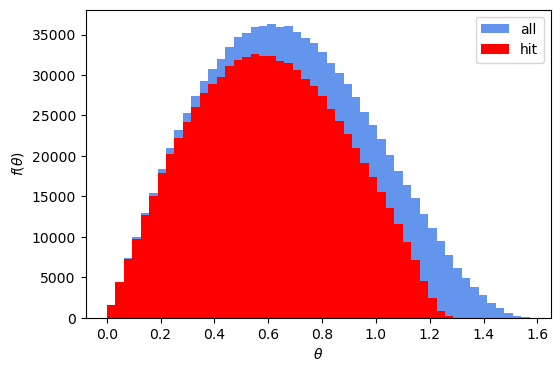

In [67]:
plt.figure(figsize=(6, 4))
theta_range=[0, np.pi/2]
plt.hist(theta_tot, density=False, bins=50, range=theta_range, color='cornflowerblue', label='all')
plt.hist(theta_hit, density=False, bins=50, range=theta_range, color='red', label='hit')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.legend()
plt.show()

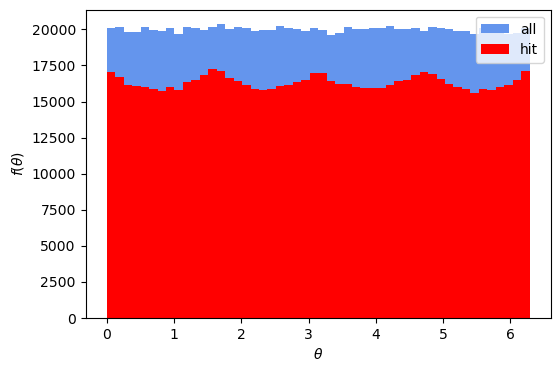

In [68]:
plt.figure(figsize=(6, 4))
phi_range=[0, 2*np.pi]
plt.hist(phi_tot, density=False, bins=50, range=phi_range, color='cornflowerblue', label='all')
plt.hist(phi_hit, density=False, bins=50, range=phi_range, color='red', label='hit')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.legend()
plt.show()

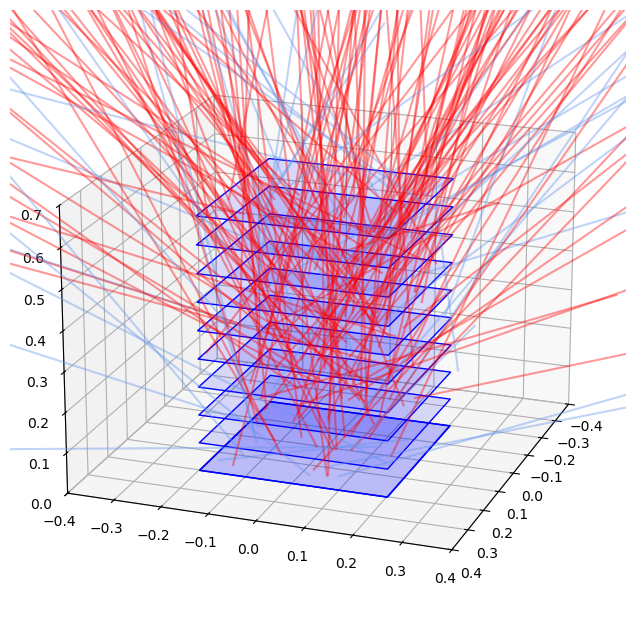

In [76]:
l = 0.4
h = 0.07
n_p = 10
n_mc = 10000
n_hit = 0
theta_tot, phi_tot = [], []
theta_hit, phi_hit = [], []

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
nmax = 20

plane_vtx = np.array([[-l/2, -l/2, 0], [l/2, -l/2, 0], [l/2, l/2, 0], [-l/2, l/2, 0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx], closed=True)
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)
m = 1
ax.set_xlim3d(-m*l, m*l)
ax.set_ylim3d(-m*l, m*l)
ax.set_zlim3d(0, n_p*h)

for i in range(n_p):
    theta = np.arccos((1 - np.random.uniform(size = n_mc))**(1/3))
    phi = 2*math.pi*np.random.uniform(size = n_mc)
    st, ct, sp, cp = np.sin(theta), np.cos(theta), np.sin(phi), np.cos(phi)
    us, vs, ws = st*cp, st*sp, ct
    x0s = np.random.uniform(-l/2, l/2, size = n_mc)
    y0s = np.random.uniform(-l/2, l/2, size = n_mc)
    z0s = np.full(n_mc, i*h)
    x1s = np.array([[x0 + (j*h-z0)*(u/w) for j in range(n_p)] for x0, z0, u, w in zip(x0s, z0s, us, ws)])
    y1s = np.array([[y0 + (j*h-z0)*(v/w) for j in range(n_p)] for y0, z0, v, w in zip(y0s, z0s, vs, ws)])
    hits = [(x>-l/2) & (x<l/2) & (y>-l/2) & (y<l/2) for x, y in zip(x1s, y1s)]
    theta_tot.append(theta)
    phi_tot.append(phi)
    
    fits = []
    for hit in hits:
        fit = (len(hit[hit==1])>2)
        fits.append(fit)
    theta_hit.append(theta[fits])
    theta_hit.append(phi[fits])
    colors = np.where(fits, 'red', 'cornflowerblue')
        
    plane_h = i*h
    plane1 = a3.art3d.Poly3DCollection([plane_vtx + [0, 0, plane_h]], closed=True)
    plane1.set_color('#0000ff20')
    plane1.set_edgecolor('#0000ff')
    ax.add_collection3d(plane1)
    x0max, y0max, z0max = x0s[:nmax], y0s[:nmax], z0s[:nmax]
    umax, vmax, wmax = us[:nmax], vs[:nmax], ws[:nmax]
    ax.quiver(x0max, y0max, z0max, umax, vmax, wmax, length=2, arrow_length_ratio=0,
          color=colors[:nmax], alpha=0.4)

plt.show()